data : https://www.kaggle.com/mirichoi0218/insurance

# **Project objectif :**

#### **Objectif**

        ==> Predict charges

#### **Metrics evaluation**

        ==> R2
        ==> Mean absolute error
        ==> Median absolute error

# ========================================================

# **Notebook :**

# Data Import

In [1]:
import pandas as pd

insurance_df = pd.read_csv("insurance.csv")
insurance_df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

# Global analysis

In [2]:
df = insurance_df.copy()

### *Shape and types :*

In [3]:
print("Lines count :", df.shape[0])
print("Columns count :", df.shape[1])

Lines count : 1338
Columns count : 7


In [4]:
for type_, count in zip (df.dtypes.value_counts().index, df.dtypes.value_counts()) :
    print(f"{str(type_)+' ' :=<20}> {count}")

object =============> 3
float64 ============> 2
int64 ==============> 2


### *Target* :

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Our target is the last column entiteled *"Global_Sales"*.

### *NaN analysis :*

<AxesSubplot:>

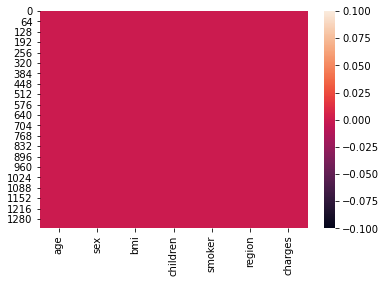

In [6]:
import seaborn as sns

sns.heatmap(df.isna())

In [7]:
# rate of nana present into each column of the dataframe
nan_rates_by_columns = round((df.isna().sum() / df.shape[0] * 100),2)

# rate of nana present into the whole dataframe
nan_count = df.isna().sum().sum()
total_values_count = df.shape[0] * df.shape[1]
total_nan_rate =  round(((nan_count / total_values_count) * 100),2)

print("NaN rate by columns : ")
for col, rate in zip(nan_rates_by_columns.index, nan_rates_by_columns) :
    print(f"\t{'> ' + col + ' ' :=<30}> {rate} %")

print(f"\nNaN rate into the whole dataframe : \n\t > {total_nan_rate} %")


NaN rate by columns : 
	> age ========================> 0.0 %
	> sex ========================> 0.0 %
	> bmi ========================> 0.0 %
	> children ===================> 0.0 %
	> smoker =====================> 0.0 %
	> region =====================> 0.0 %
	> charges ====================> 0.0 %

NaN rate into the whole dataframe : 
	 > 0.0 %


We don't have a lot of NaNs. We could fill thoses NaNs with an unique value, or we can apply an imputer (KNNImputer)

### *Target analysis :*

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


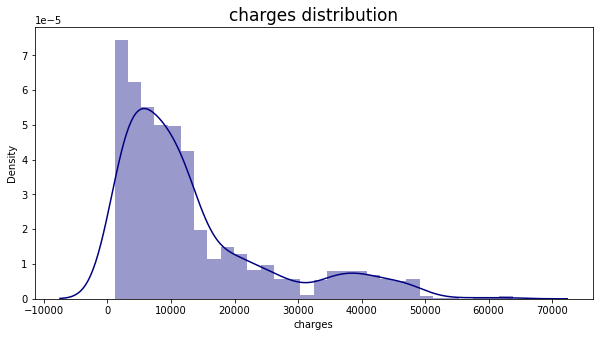

In [8]:
import matplotlib.pyplot as plt

def get_variable_distribution (df, column) :
    plt.figure(figsize=(10,5))
    sns.distplot(df[column], color = "navy")
    plt.title(column+" distribution", fontdict={"size" : 17})
    plt.show()


get_variable_distribution (df, "charges")

We can notice that the tagret has a skewed distribution ... 

### *Features analysis :*

In [9]:
X = df.drop(['charges'], axis = 1)

##### Quantitatives values :

==> *Int64* columns

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


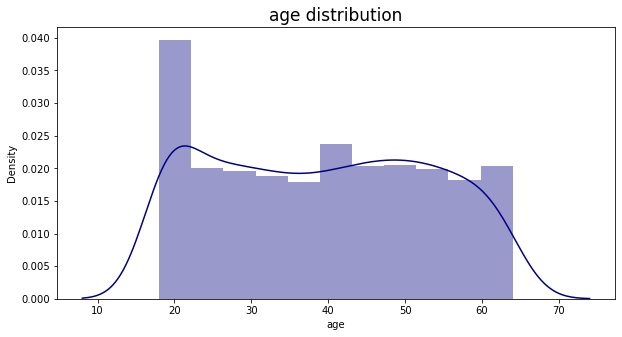

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


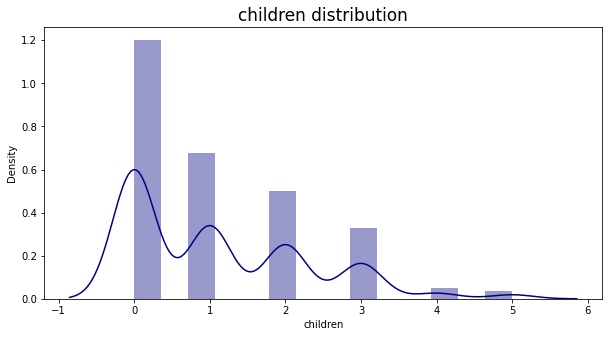

In [10]:
for col in X.select_dtypes("int64").columns :
    get_variable_distribution (X, col)

This column will be deleted : we don't have to analise it ... 

==> *Float64* columns

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


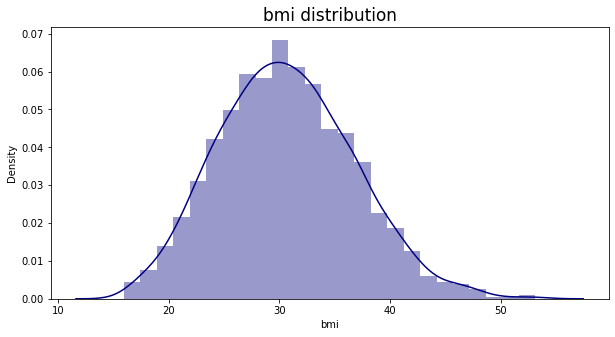

In [11]:
for col in X.select_dtypes("float64").columns :
    get_variable_distribution (X, col)

##### Qualitative values :




sex--------------------------------------------------------- ['female' 'male']


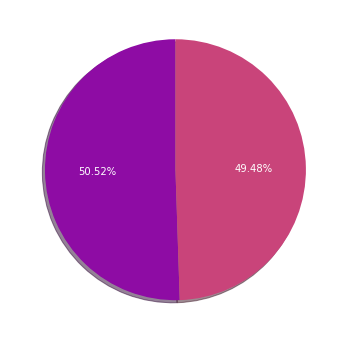




smoker------------------------------------------------------ ['yes' 'no']


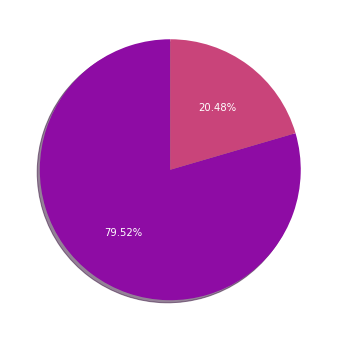




region------------------------------------------------------ ['southwest' 'southeast' 'northwest' 'northeast']


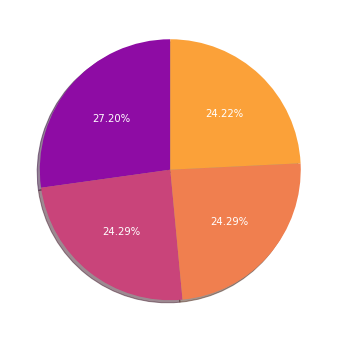

In [12]:
import numpy as np

def get_qualitative_features_values (df, types) :

    cmap = plt.get_cmap("plasma")
    
    
    for column in df.select_dtypes(types) :
        print(f"\n\n\n{column :-<60} {df[column].unique()}")

        colors_list = cmap( 
                            np.random.randint(
                                100,
                                360,
                                len( df[column].unique() )
                            )
                        )

        plt.figure(figsize=(6,6))
        plt.pie(
            df[column].value_counts(),
            shadow = True, 
            labels = df[column].value_counts().index, 
            #colors = ["purple"],
            colors = cmap(np.array([75,125,175,200])),
            autopct = '%.2f%%',
            startangle = 90,
            textprops = dict(color ="white"),
        )  
        plt.show()
        
get_qualitative_features_values (X, 'object')

### *Correlation analysis :*

##### Quantitative features correlations analysis :

<AxesSubplot:>

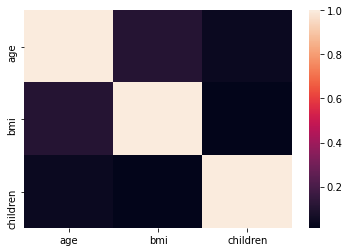

In [13]:
sns.heatmap(X.select_dtypes(["float64","int64"]).corr())

##### Qualitative features correlations analysis :

In [14]:
X.select_dtypes(["object"]).head()

sex smoker     region
0  female    yes  southwest
1    male     no  southeast
2    male     no  southeast
3    male     no  northwest
4    male     no  northwest

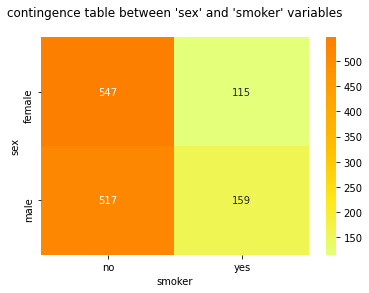

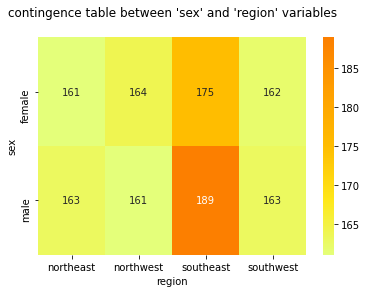

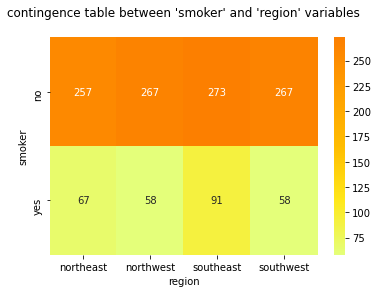

In [15]:
sns.heatmap(pd.crosstab(X["sex"], X["smoker"]), cmap="Wistia", annot = True, fmt='d')
plt.title("contingence table between 'sex' and 'smoker' variables\n")
plt.show()

sns.heatmap(pd.crosstab(X["sex"], X["region"]), cmap="Wistia", annot = True, fmt='d')
plt.title("contingence table between 'sex' and 'region' variables\n")
plt.show()

sns.heatmap(pd.crosstab(X["smoker"], X["region"]), cmap="Wistia", annot = True, fmt='d')
plt.title("contingence table between 'smoker' and 'region' variables\n")
plt.show()

##### Qualitative / Quantitative features correlations analysis :

==> sex / numerical features correlation

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


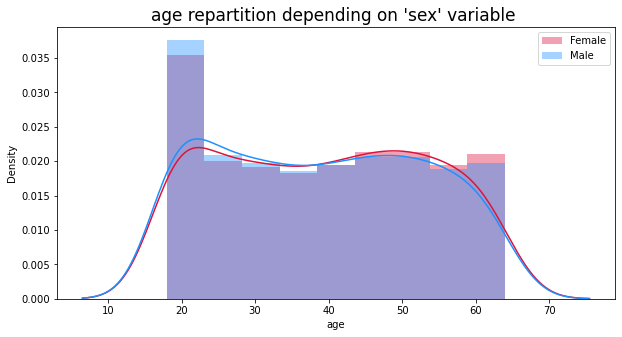

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


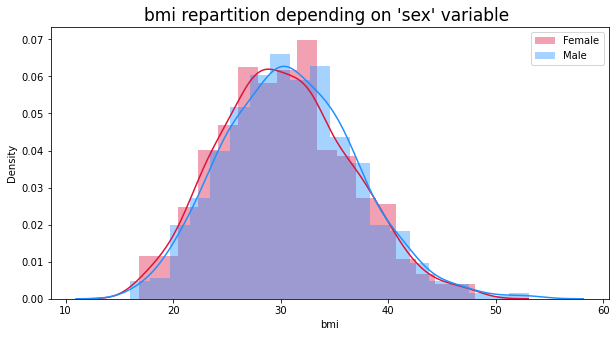

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


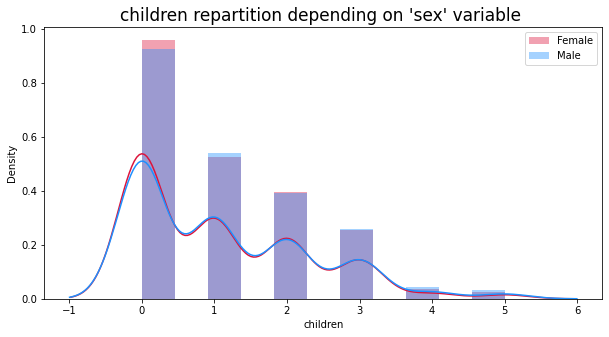

In [16]:
Xfemale = X[X["sex"] == "female" ]
Xmale = X[X["sex"] == "male" ]

def get_variable_distribution_by_gender (column) :
    plt.figure(figsize=(10,5))
    sns.distplot(Xfemale[column], label="Female", color = "crimson")
    sns.distplot(Xmale[column], label="Male", color =  "dodgerblue")
    plt.title(f"{column} repartition depending on 'sex' variable ", fontdict={"size" : 17})
    plt.legend()
    plt.show()
    
def get_quantitative_variables_distribution (df, types) :
    for i in df.select_dtypes(types) :
        get_variable_distribution_by_gender (i)
        
get_quantitative_variables_distribution (X, ["int64", "float64"])

==> smoker / numerical features correlation

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


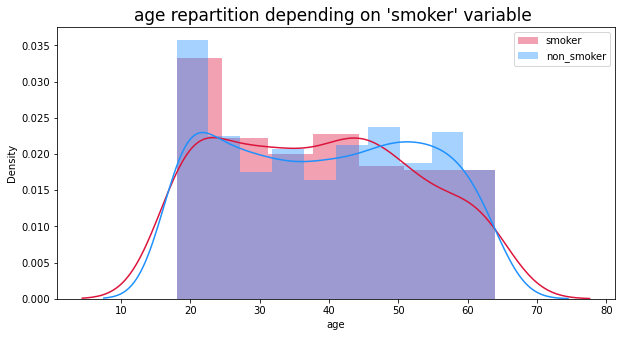

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


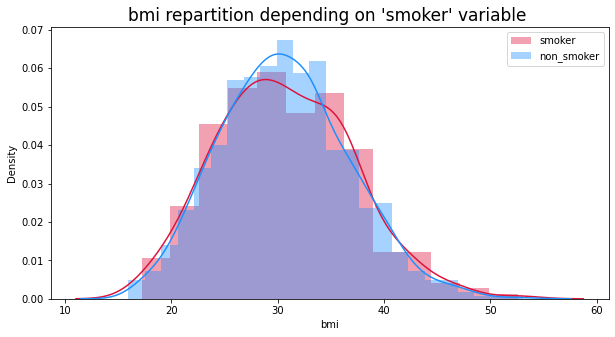

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


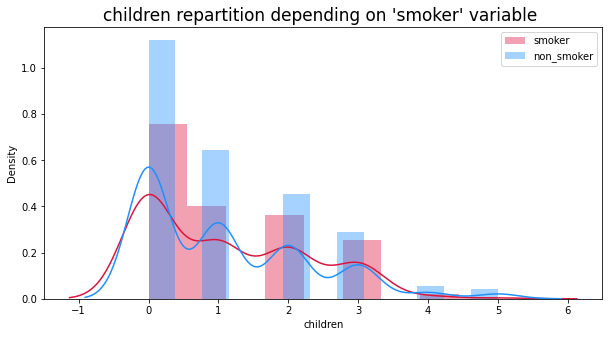

In [17]:
Xsmoker = X[X["smoker"] == "yes" ]
Xnon_smoker = X[X["smoker"] == "no" ]

def get_variable_distribution_by_gender (column) :
    plt.figure(figsize=(10,5))
    sns.distplot(Xsmoker[column], label="smoker", color = "crimson")
    sns.distplot(Xnon_smoker[column], label="non_smoker", color =  "dodgerblue")
    plt.title(f"{column} repartition depending on 'smoker' variable ", fontdict={"size" : 17})
    plt.legend()
    plt.show()
    
def get_quantitative_variables_distribution (df, types) :
    for i in df.select_dtypes(types) :
        get_variable_distribution_by_gender (i)
        
get_quantitative_variables_distribution (X, ["int64", "float64"])

==> region / numerical features correlation

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

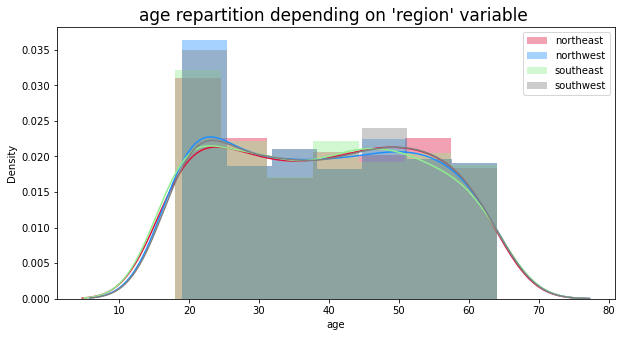

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

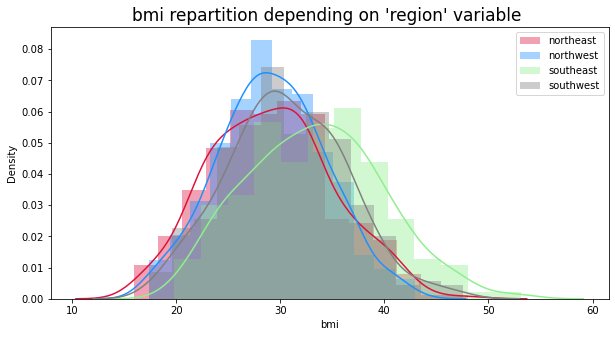

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

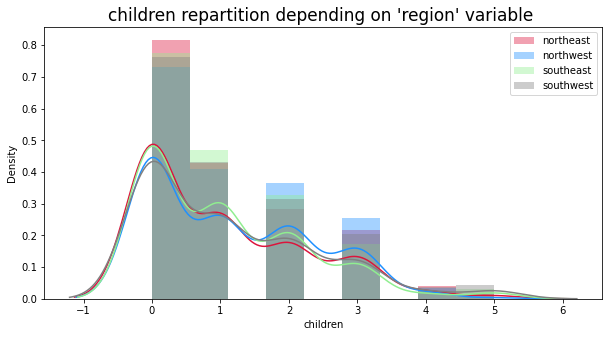

In [18]:
Xnortheast = X[X["region"] == "northeast" ]
Xnorthwest = X[X["region"] == "northwest" ]
Xsoutheast= X[X["region"] == "southeast" ]
Xsouthwest = X[X["region"] == "southwest" ]

def get_variable_distribution_by_gender (column) :
    plt.figure(figsize=(10,5))
    sns.distplot(Xnortheast[column], label="northeast", color = "crimson")
    sns.distplot(Xnorthwest[column], label="northwest", color =  "dodgerblue")
    sns.distplot(Xsoutheast[column], label="southeast", color = "lightgreen")
    sns.distplot(Xsouthwest[column], label="southwest", color =  "gray")
    plt.title(f"{column} repartition depending on 'region' variable ", fontdict={"size" : 17})
    plt.legend()
    plt.show()
    
def get_quantitative_variables_distribution (df, types) :
    for i in df.select_dtypes(types) :
        get_variable_distribution_by_gender (i)
        
get_quantitative_variables_distribution (X, ["int64", "float64"])

##### Target / Features correlations analysis :

==> Target / Quantitative features correlations analysis

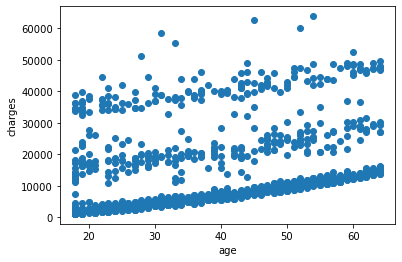

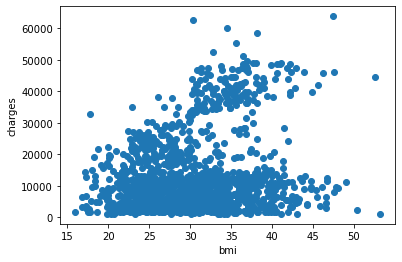

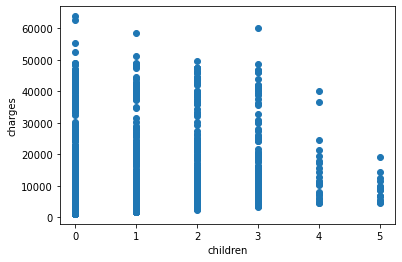

In [19]:


for col in  X.select_dtypes(["int64","float64"]).columns :
    plt.scatter(X[col],y)
    plt.xlabel(col)
    plt.ylabel("charges")
    plt.show()

==> Target / Qualitative features correlations analysis

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


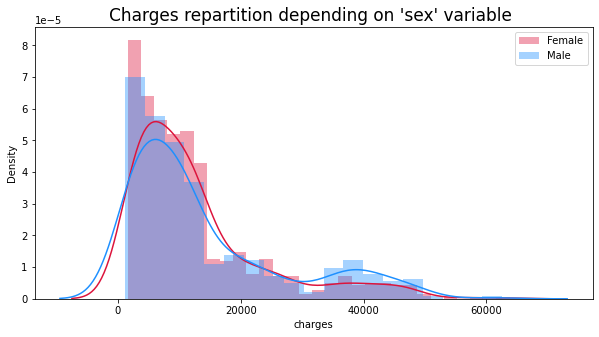

In [20]:
y_female = df[df["sex"] == "female" ]["charges"]
y_male = df[df["sex"] == "male" ]["charges"]

plt.figure(figsize=(10,5))
sns.distplot(y_female, label="Female", color = "crimson")
sns.distplot(y_male, label="Male", color =  "dodgerblue")
plt.title(f"Charges repartition depending on 'sex' variable ", fontdict={"size" : 17})
plt.legend()
plt.show()

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


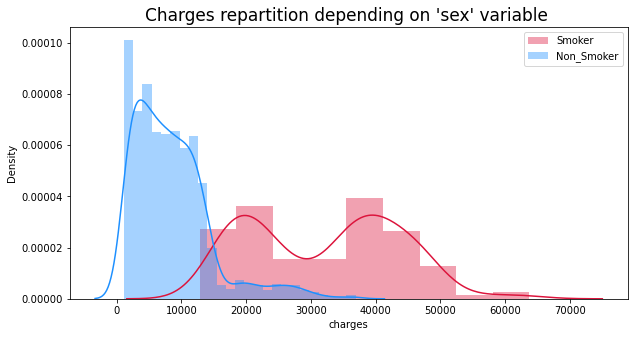

In [21]:
y_smoker = df[df["smoker"] == "yes" ]["charges"]
y_non_smoker = df[df["smoker"] == "no" ]["charges"]

plt.figure(figsize=(10,5))
sns.distplot(y_smoker, label="Smoker", color = "crimson")
sns.distplot(y_non_smoker, label="Non_Smoker", color =  "dodgerblue")
plt.title(f"Charges repartition depending on 'smoker' variable ", fontdict={"size" : 17})
plt.legend()
plt.show()




E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

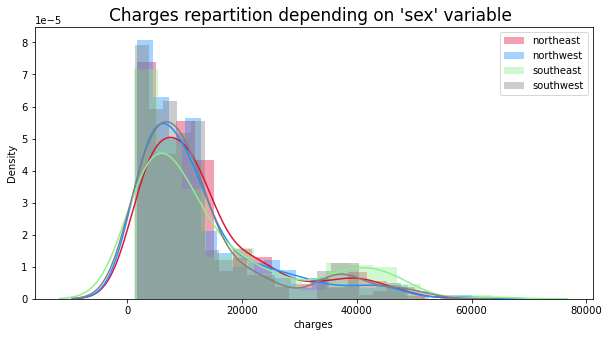

In [22]:
y_northeast = df[df["region"] == "northeast" ]["charges"]
y_northwest = df[df["region"] == "northwest" ]["charges"]
y_southeast = df[df["region"] == "southeast" ]["charges"]
y_southwest = df[df["region"] == "southwest" ]["charges"]

plt.figure(figsize=(10,5))
sns.distplot(y_northeast, label="northeast", color = "crimson")
sns.distplot(y_northwest, label="northwest", color =  "dodgerblue")
sns.distplot(y_southeast, label="southeast", color = "lightgreen")
sns.distplot(y_southwest, label="southwest", color =  "gray")
plt.title(f"Charges repartition depending on 'region' variable ", fontdict={"size" : 17})
plt.legend()
plt.show()

# Data set prepocessing

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

hot_encoder = OneHotEncoder(sparse=False)
sex_encoded = pd.DataFrame(
    hot_encoder.fit_transform(X[["sex"]]),
    columns=['Female', 'Male']
)

region_encoded = pd.DataFrame(
    hot_encoder.fit_transform(X[["region"]]), 
    columns=['Northeast_region', 'Northwest_region','Southeast_region', 'Southwest_region']
)

X = X.join([sex_encoded,region_encoded])
X = X.drop(["sex", "region"], axis = 1)

ordinal_encoder = OrdinalEncoder()
smoker_encoded = pd.DataFrame(
    ordinal_encoder.fit_transform(X[['smoker']]),
    columns=['smoker']
)

X = X.drop(["smoker"], axis = 1).join(smoker_encoded)

X

age     bmi  children  Female  Male  Northeast_region  Northwest_region  \
0      19  27.900         0     1.0   0.0               0.0               0.0   
1      18  33.770         1     0.0   1.0               0.0               0.0   
2      28  33.000         3     0.0   1.0               0.0               0.0   
3      33  22.705         0     0.0   1.0               0.0               1.0   
4      32  28.880         0     0.0   1.0               0.0               1.0   
...   ...     ...       ...     ...   ...               ...               ...   
1333   50  30.970         3     0.0   1.0               0.0               1.0   
1334   18  31.920         0     1.0   0.0               1.0               0.0   
1335   18  36.850         0     1.0   0.0               0.0               0.0   
1336   21  25.800         0     1.0   0.0               0.0               0.0   
1337   61  29.070         0     1.0   0.0               0.0               1.0   

      Southeast_region  Southwest_region  smoker  
0                  0.0               1.0     1.0  
1                  1.0               0.0     0.0  
2                  1.0               0.0     0.0  
3                  0.0               0.0     0.0  
4                  0.0               0.0     0.0  
...                ...               ...     ...  
1333               0.0               0.0     0.0  
1334               0.0               0.0     0.0  
1335               1.0               0.0     0.0  
1336               0.0               1.0     0.0  
1337               0.0               0.0     1.0  

[1338 rows x 10 columns]

# Model fit and optimization

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
y_train = np.array(y_train).reshape(y_train.shape[0],1)
y_test = np.array(y_test).reshape(y_test.shape[0],1)


In [27]:
print("X_train shape ==>", X_train.shape)
print("X_test shape ==>", X_test.shape)
print("y_train shape ==>", y_train.shape)
print("y_test shape ==>", y_test.shape)

Xtrain shape ==> (1070, 10)
Xtest shape ==> (268, 10)
y_train shape ==> (1070, 1)
y_test shape ==> (268, 1)


#### Model inialisation and fit

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Model application

In [32]:
y_pred = model.predict(X_test)

#### Result visualisation

We can't plot all dimensions of our data set, but we can plot some dimensions, independtly, to see what is look like the predictions of our regression model

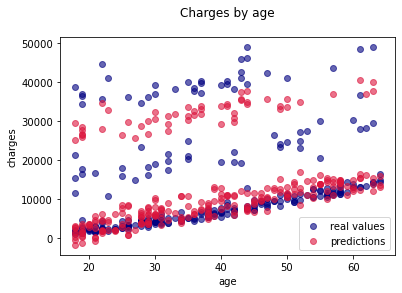

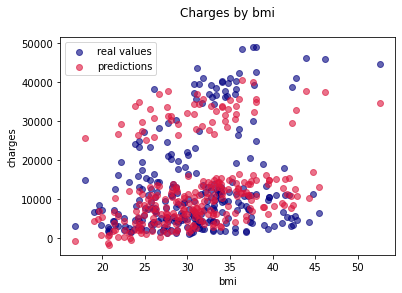

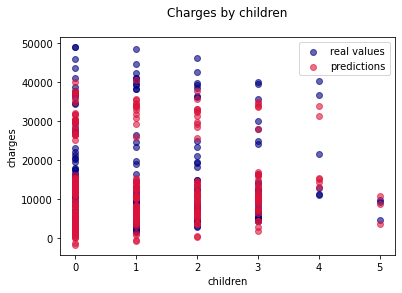

In [55]:

def plot_prediction_vs_reality (x) :
    plt.figure()
    plt.title(f"Charges by {x}\n")
    plt.scatter(X_test[x], y_test, c = "navy", label = 'real values', alpha= 0.6)
    plt.scatter(X_test[x], y_pred, c = "crimson" ,label = 'predictions', alpha= 0.6)
    plt.xlabel(x)
    plt.ylabel("charges")
    plt.legend()

plot_prediction_vs_reality ("age")
plot_prediction_vs_reality ("bmi") 
plot_prediction_vs_reality ("children")

#### Model evaluation

In [64]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score

R2 = round(((r2_score(y_test, y_pred)) * 100),2)
Mean_abs_erro = round(mean_absolute_error(y_test, y_pred),2)
Median_abs_error = round(median_absolute_error(y_test, y_pred),2)

print(f"Our predictions fit at {R2} %") # Rate of matching values of the set on the regression line
print(f"Max 'charges' real value : {round(y_test.max(), 2)} $")
print(f"Min 'charges' real value : {round(y_test.min(), 2)} $")
print(f"The average error is (Mean absolute error) = {Mean_abs_erro} $") # The average error
print(f"The median error is (Median absolute error) = {Median_abs_error} $") # The median error

Our predictions fit at 78.62 %
Max 'charges' real value : 48885.14 $
Min 'charges' real value : 1131.51 $
The average error is (Mean absolute error) = 4032.55 $
The median error is (Median absolute error) = 2453.02 $
